<a href="https://colab.research.google.com/github/fowardelcac/Abandono-Escolar/blob/main/Notebooks/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fowardelcac/Abandono-Escolar.git

fatal: destination path 'Abandono-Escolar' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Abandono-Escolar/Dataset/dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
df.duplicated().sum()

0

 # Variables cuantitativas

*   Age at enrollment (Edad al inscribirse): La edad del estudiante al momento de la inscripción. (Numérico)
- Curricular units 1st sem (credited) (Unidades curriculares 1er semestre (acreditadas)): El número de unidades - curriculares acreditadas por el estudiante en el primer semestre. (Numérico)
- Curricular units 1st sem (enrolled) (Unidades curriculares 1er semestre (inscritas)): El número de unidades curriculares inscritas por el estudiante en el primer semestre. (Numérico)
- Curricular units 1st sem (evaluations) (Unidades curriculares 1er semestre (evaluadas)): El número de unidades curriculares evaluadas por el estudiante en el primer semestre. (Numérico)
- Curricular units 1st sem (approved) (Unidades curriculares 1er semestre (aprobadas)): El número de unidades curriculares aprobadas por el estudiante en el primer semestre. (Numérico)




In [6]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [7]:
columnas = [
            'Age at enrollment',
            'Curricular units 1st sem (credited)',
            'Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (evaluations)',
            'Curricular units 1st sem (approved)',
            'Curricular units 1st sem (grade)',
            'Curricular units 1st sem (without evaluations)',
            'Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (enrolled)',
            'Curricular units 2nd sem (evaluations)',
            'Curricular units 2nd sem (approved)',
            'Curricular units 2nd sem (grade)',
            'Curricular units 2nd sem (without evaluations)',
            'Unemployment rate',
            'Inflation rate',
            'GDP'
       ]
df_numerico = df.filter(columnas, axis = 1)
df_categorico = df.drop(columnas, axis = 1)

In [8]:
df_numerico.describe()

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# Age at enrollment
La edad del estudiante al momento de la inscripción. [texto del vínculo](https://)

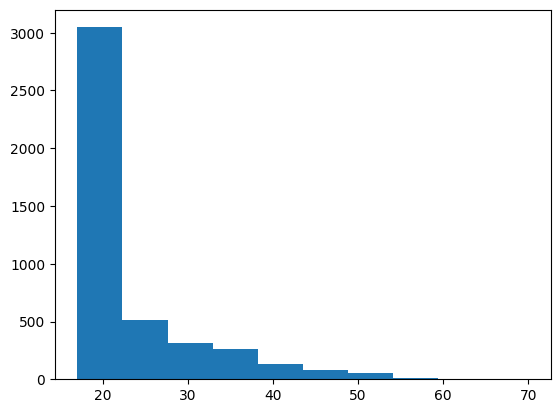

In [9]:
plt.hist(df['Age at enrollment'])
plt.show()

Número de unidades curriculares acreditadas en el primer semestre (credited): Este número se refiere a la cantidad de cursos o materias que un estudiante ha completado satisfactoriamente y ha recibido créditos académicos por ellas durante el primer semestre de su programa educativo. En otras palabras, son las materias que el estudiante ha superado con éxito y que cuentan para su avance en el programa.

Unidades curriculares inscritas en el primer semestre (enrolled): Este número representa la cantidad de cursos o materias en los que un estudiante se ha inscrito o registrado para tomar durante el primer semestre de su programa académico. Estas son las materias que el estudiante planea cursar en ese período específico.

Unidades curriculares evaluadas en el primer semestre (evaluation): Este valor indica cuántas de las unidades curriculares inscritas por el estudiante han sido sometidas a evaluación o exámenes durante el primer semestre. No todos los cursos en los que un estudiante se inscribe necesariamente tienen evaluaciones, por lo que este número podría ser menor que el número de unidades inscritas.

Unidades curriculares aprobadas en el primer semestre (approved): Este número refleja cuántas de las unidades curriculares que el estudiante evaluó durante el primer semestre han sido aprobadas, es decir, cuántos cursos ha superado con éxito.

In [10]:
df_numerico2 = df_numerico.filter(['Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP'], axis = 1)
df_numerico2['Enrolled1'] = df_numerico['Curricular units 1st sem (enrolled)']
df_numerico2['Approved1'] = df_numerico['Curricular units 1st sem (approved)']
df_numerico2['Enrolled2'] = df_numerico['Curricular units 2nd sem (enrolled)']
df_numerico2['Approved2'] = df_numerico['Curricular units 2nd sem (approved)']

In [11]:
df_numerico2

,Age at enrollment,Unemployment rate,Inflation rate,GDP,Enrolled1,Approved1,Enrolled2,Approved2
0,20,10.8,1.4,1.74,0,0,0,0
1,19,13.9,-0.3,0.79,6,6,6,6
2,19,10.8,1.4,1.74,6,0,6,0
3,20,9.4,-0.8,-3.12,6,6,6,5
4,45,13.9,-0.3,0.79,6,5,6,6
...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,6,5,6,5
4420,18,11.1,0.6,2.02,6,6,6,2
4421,30,13.9,-0.3,0.79,7,7,8,1
4422,20,9.4,-0.8,-3.12,5,5,5,5


[Enrolled1](https://)	Approved1	Enrolled2	Approved2


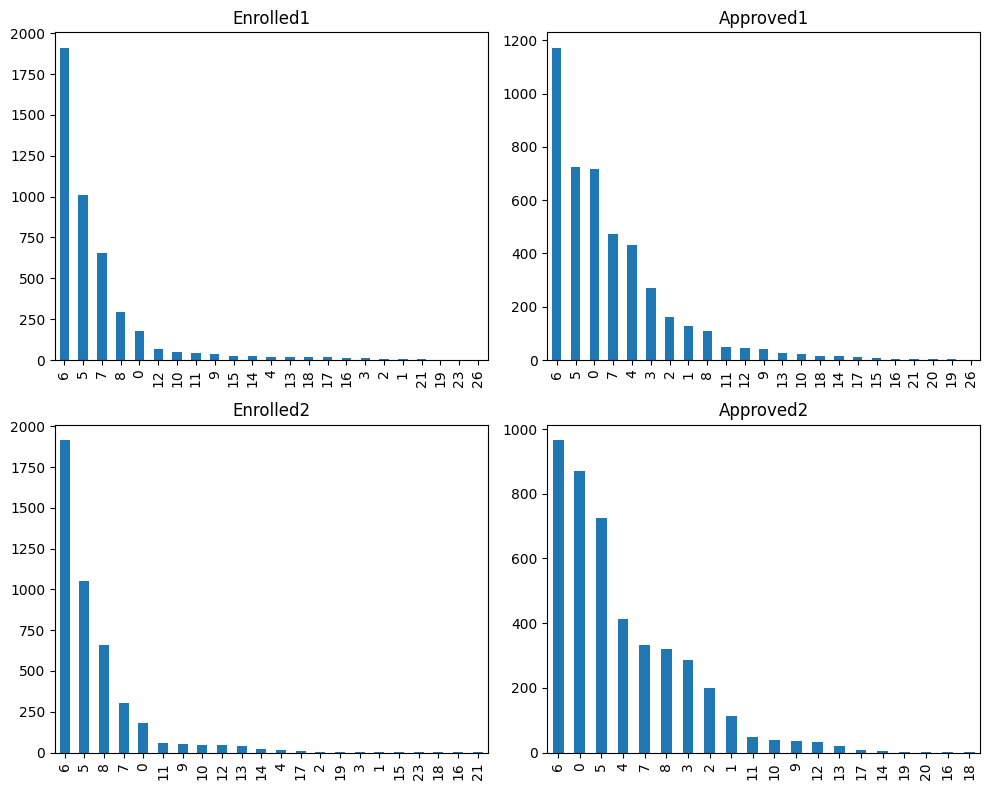

In [12]:
# Crear un subplot con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Gráficos de barras para variables categóricas
df_numerico2['Enrolled1'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Enrolled1')

df_numerico2['Approved1'].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Approved1')

df_numerico2['Enrolled2'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Enrolled2')

df_numerico2['Approved2'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Approved2')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura con los subplots
plt.show()


In [13]:
df_numerico2['Tasa_1st'] = (df_numerico2.Approved1 / df_numerico2.Enrolled1) * 100
df_numerico2['Tasa_2nd'] = (df_numerico2.Approved2 / df_numerico2.Enrolled2) * 100
df_numerico2

,Age at enrollment,Unemployment rate,Inflation rate,GDP,Enrolled1,Approved1,Enrolled2,Approved2,Tasa_1st,Tasa_2nd
0,20,10.8,1.4,1.74,0,0,0,0,NaN,NaN
1,19,13.9,-0.3,0.79,6,6,6,6,100.000000,100.000000
2,19,10.8,1.4,1.74,6,0,6,0,0.000000,0.000000
3,20,9.4,-0.8,-3.12,6,6,6,5,100.000000,83.333333
4,45,13.9,-0.3,0.79,6,5,6,6,83.333333,100.000000
...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,6,5,6,5,83.333333,83.333333
4420,18,11.1,0.6,2.02,6,6,6,2,100.000000,33.333333
4421,30,13.9,-0.3,0.79,7,7,8,1,100.000000,12.500000
4422,20,9.4,-0.8,-3.12,5,5,5,5,100.000000,100.000000


In [14]:
df_numerico2.fillna(0, inplace=True)

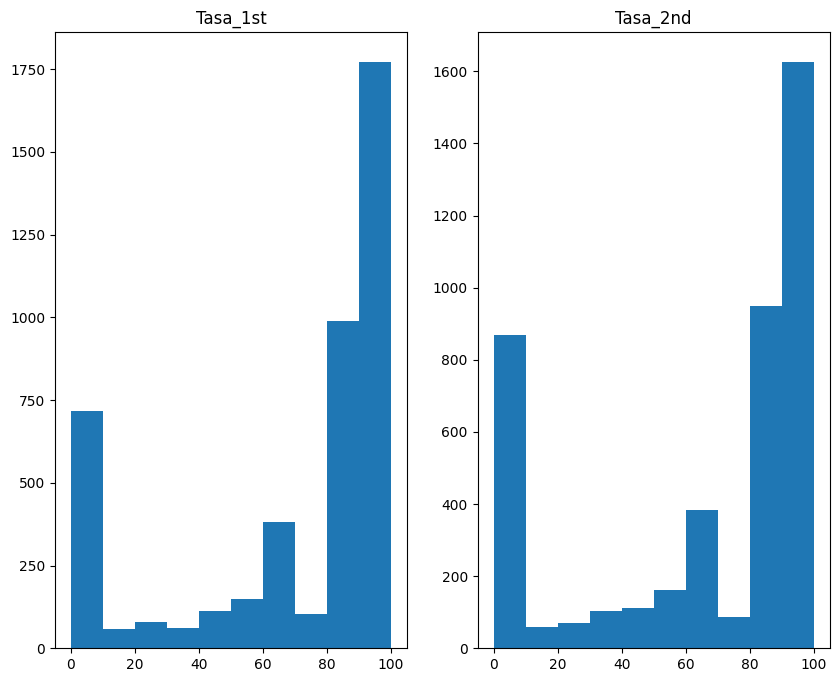

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].hist(df_numerico2.Tasa_1st)
axes[0].set_title('Tasa_1st')

axes[1].hist(df_numerico2.Tasa_2nd)
axes[1].set_title('Tasa_2nd')

plt.show()

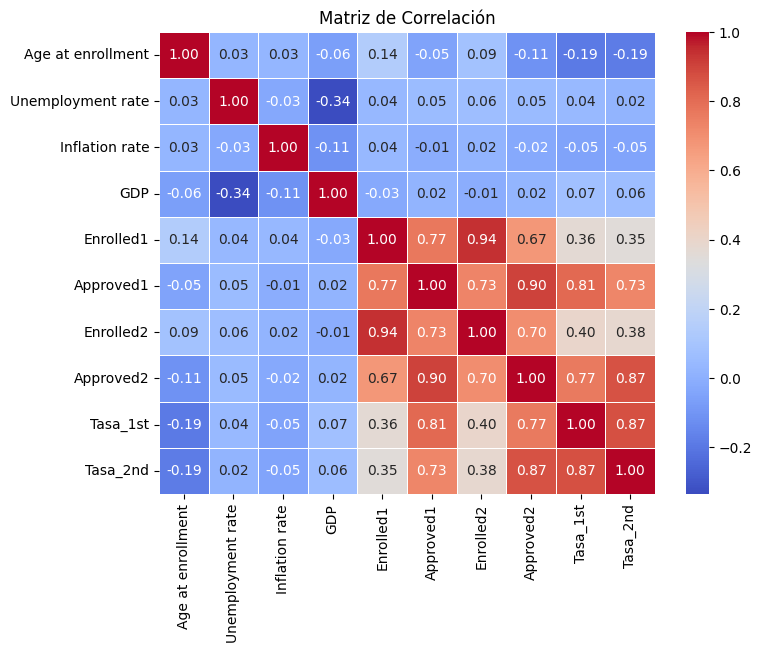

In [16]:
correlation_matrix = df_numerico2.corr()

# Crear un mapa de calor (heatmap) utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Configurar el título del gráfico
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

# df_categorico

In [17]:
df_categorico

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,0,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,0,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,0,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,0,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,0,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,1,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,0,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,0,Graduate


In [18]:
df_categorico.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'International', 'Target'],
      dtype='object')

In [19]:
cols = ['Marital status', 'Daytime/evening attendance', 'Course', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'International', 'Target']
dataf = df_categorico.filter(cols, axis = 1)

# Target

<Axes: >

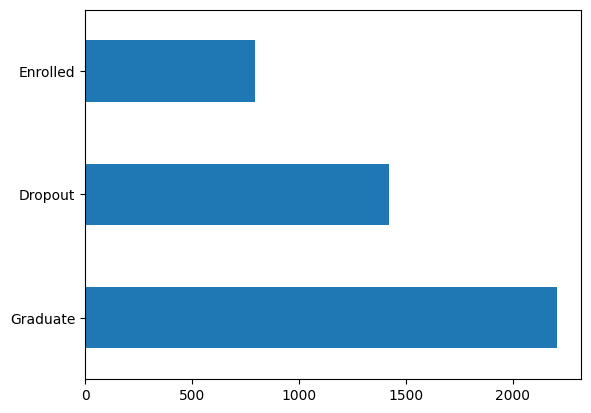

In [20]:
df_categorico.Target.value_counts().plot(kind = 'barh')

In [21]:
n = len(df_categorico.Target)
dropout = (len(df_categorico[df_categorico.Target == 'Dropout']) / n) * 100
enrolled = (len(df_categorico[df_categorico.Target == 'Enrolled']) / n) * 100
graduate = (len(df_categorico[df_categorico.Target == 'Graduate']) / n) * 100
dropout, enrolled, graduate

(32.120253164556964, 17.94755877034358, 49.93218806509946)

In [22]:
dataf.head()

,Marital status,Daytime/evening attendance,Course,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,1,1,2,0,0,1,1,0,0,Dropout
1,1,1,11,0,0,0,1,0,0,Graduate
2,1,1,5,0,0,0,1,0,0,Dropout
3,1,1,15,0,0,1,0,0,0,Graduate
4,2,0,3,0,0,1,0,0,0,Graduate


In [23]:
dataf['Target'] = dataf['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})
dataf.head()

,Marital status,Daytime/evening attendance,Course,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
0,1,1,2,0,0,1,1,0,0,0
1,1,1,11,0,0,0,1,0,0,1
2,1,1,5,0,0,0,1,0,0,0
3,1,1,15,0,0,1,0,0,0,1
4,2,0,3,0,0,1,0,0,0,1


# Marital status
1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

Agrupare:

*   [1, 3, 4, 6] -> 0: soltero
*   [2, 5] -> 1: en pareja




In [24]:
dataf['Marital status'].value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64

<Axes: >

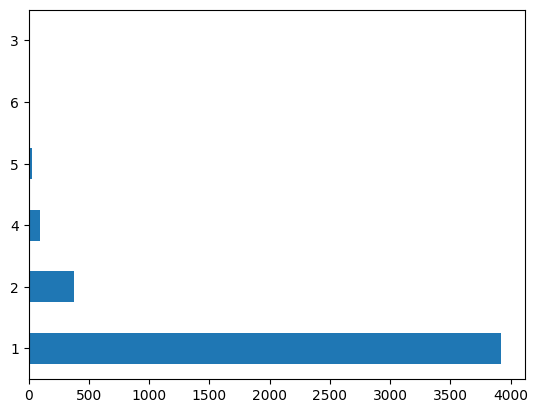

In [25]:
dataf['Marital status'].value_counts().plot(kind = 'barh')

<Axes: >

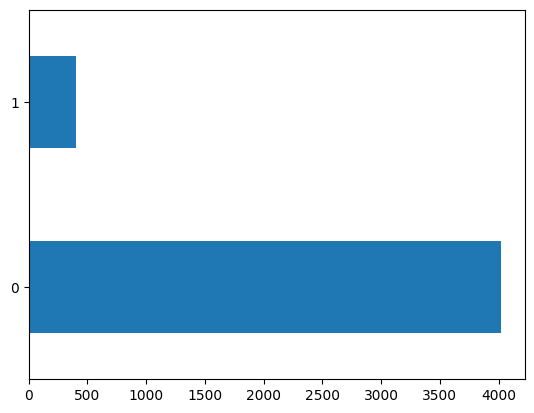

In [26]:
dataf['Marital status'] = dataf['Marital status'].map({
    1: 0,
    3: 0,
    4: 0,
    6: 0,
    2: 1,
    5: 1
    })
dataf['Marital status'].value_counts().plot(kind = 'barh')

Esto tiene sentido, ya que el q3 de la edad es: 25	 y la mediana esta en los 20 años

In [27]:
dataf.rename(columns={
    'Daytime/evening attendance': 'attendance',
    'Educational special needs': 'Esn',
    'Tuition fees up to date': 'fees',
    'Scholarship holder': 'scholarship'
}, inplace=True)
dataf.head()

,Marital status,attendance,Course,Esn,Debtor,fees,Gender,scholarship,International,Target
0,0,1,2,0,0,1,1,0,0,0
1,0,1,11,0,0,0,1,0,0,1
2,0,1,5,0,0,0,1,0,0,0
3,0,1,15,0,0,1,0,0,0,1
4,1,0,3,0,0,1,0,0,0,1


# attendance
1 – daytime 0 - evening

<Axes: >

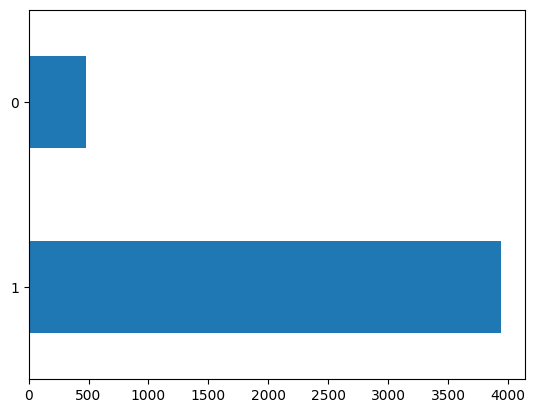

In [28]:
dataf.attendance.value_counts().plot(kind = 'barh')

El 89% de los alumnos va durante el dia, el resti por la tarde

In [29]:
dt = (len(dataf[dataf.attendance == 1]) / n) * 100
de = (len(dataf[dataf.attendance == 0]) / n) * 100
dt, de

(89.08227848101265, 10.917721518987342)

# Course


- 1: Biofuel Production Technologies,
- 2: Animation and Multimedia Design,
- 3: Social Service (Evening Attendance),
- 4: Agronomy,
- 5: Communication Design,
- 6: Veterinary Nursing,
- 7: Informatics Engineering,
- 8: Equiniculture,
- 9: Management,
- 10: Social Service,
- 11: Tourism,
- 12: Nursing,
- 13: Oral Hygiene,
- 14: Advertising and Marketing Management,
- 15: Journalism and Communication,
- 16: Basic Education,
- 17: Management (Evening Attendance)

## Sector Tecnología y Diseño -> 0
Animation and Multimedia Design
Informatics Engineering
Communication Design

## Sector Agronomía y Veterinaria -> 1
Agronomy
Veterinary Nursing
Equiniculture

## Sector Servicios Sociales y Salud -> 2
Social Service (Evening Attendance)
Social Service
Nursing
Oral Hygiene
## Sector Negocios y Comunicación -> 3
Management
Management (Evening Attendance)
Advertising and Marketing Management
Journalism and Communication

## Sector Turismo -> 4
Tourism

## Sector Educación -> 5
Basic Education

## Sector Energías Renovables -> 6
Biofuel Production Technologies

<Axes: >

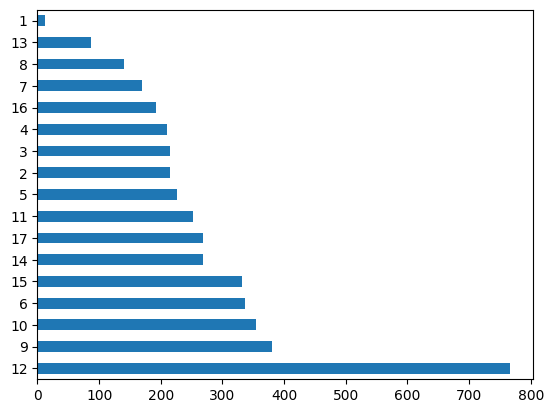

In [30]:
dataf.Course.value_counts().plot(kind = 'barh')

In [33]:
p = dataf[dataf.Sector.isnull() == True]
p.Course.value_counts()

Series([], Name: Course, dtype: int64)

<Axes: >

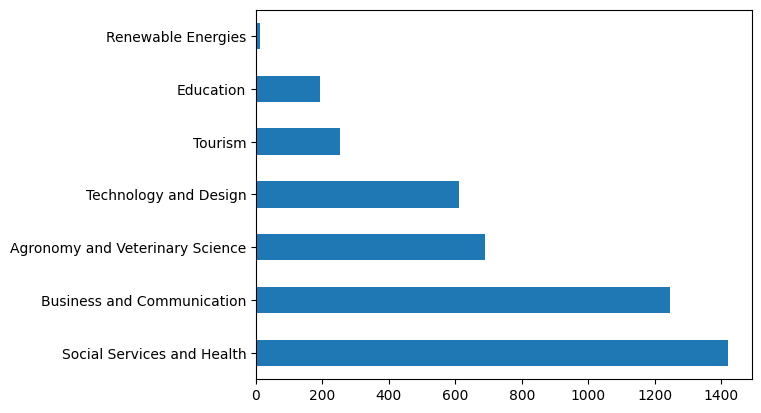

In [49]:
categories = {
    'Technology and Design': [2, 5, 7],
    'Agronomy and Veterinary Science': [4, 6, 8],
    'Social Services and Health': [3, 10, 12, 13],
    'Business and Communication': [5, 9, 17, 14, 15],
    'Tourism': [11],
    'Education': [16],
    'Renewable Energies': [1]
}
# Agregar una nueva columna 'Sector' al DataFrame
dataf['Sector'] = dataf['Course'].apply(lambda x: next((sector for sector, carreras in categories.items() if x in carreras), None))
dataf.Sector.value_counts().plot(kind = 'barh')

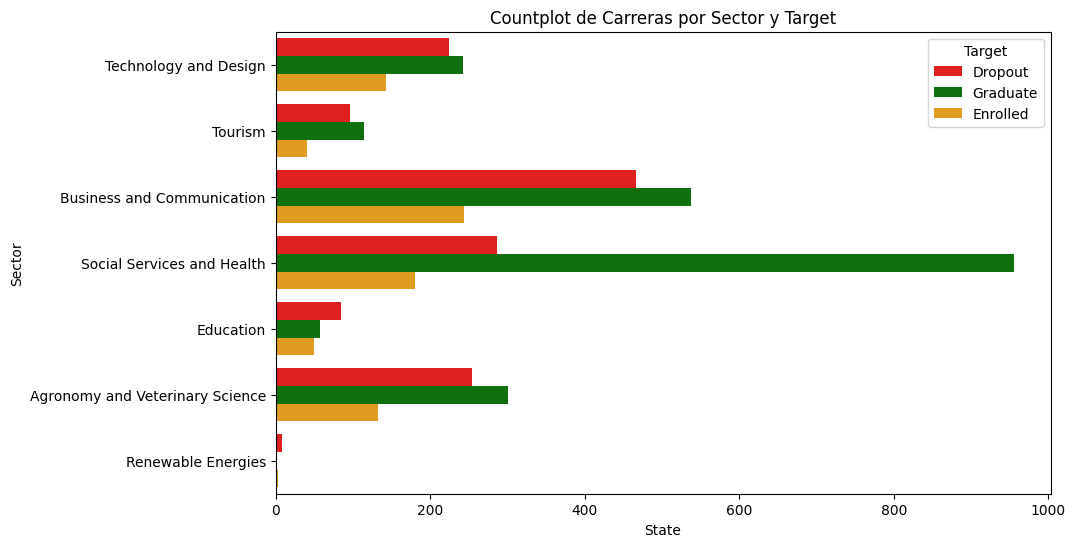

In [51]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura

sns.countplot(data=dataf, y='Sector', hue='Target', palette = {0: "red", 1: "green", 2: 'orange'})

# Personalizar el gráfico
plt.title("Countplot de Carreras por Sector y Target")
plt.xlabel("State")
plt.ylabel("Sector")
plt.legend(title="Target", labels=["Dropout", "Graduate", "Enrolled"])

# Mostrar el gráfico
plt.show()

# Education special needs

In [54]:
dataf.Esn.value_counts()

0    4373
1      51
Name: Esn, dtype: int64

Solamente 51 alumnos de 4373 cuentan con necesidades educativas especiales, x lo tanto eliominare la columna probablemente no me ayude a predecir

# Debtor & fees

In [59]:
dataf['Debtor'].value_counts()

0    3921
1     503
Name: Debtor, dtype: int64

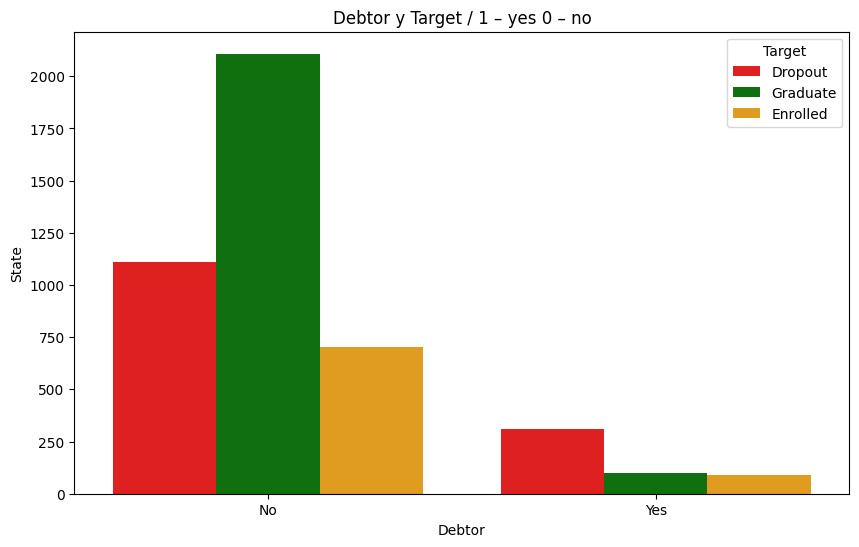

In [65]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura

sns.countplot(data = dataf, x ='Debtor', hue = 'Target', palette = {0: "red", 1: "green", 2: 'orange'})

# Personalizar el gráfico
plt.title("Debtor y Target / 1 – yes 0 – no")
plt.xlabel("Debtor")
plt.ylabel("State")
plt.legend(title="Target", labels=["Dropout", "Graduate", "Enrolled"])
plt.xticks(ticks=[0,1], labels=['No','Yes'])


# Mostrar el gráfico
plt.show()

Son pocos alumnos con deuda de los cuales la mayor cantidad abandono los estudios

In [60]:
dataf['fees'].value_counts()

1    3896
0     528
Name: fees, dtype: int64

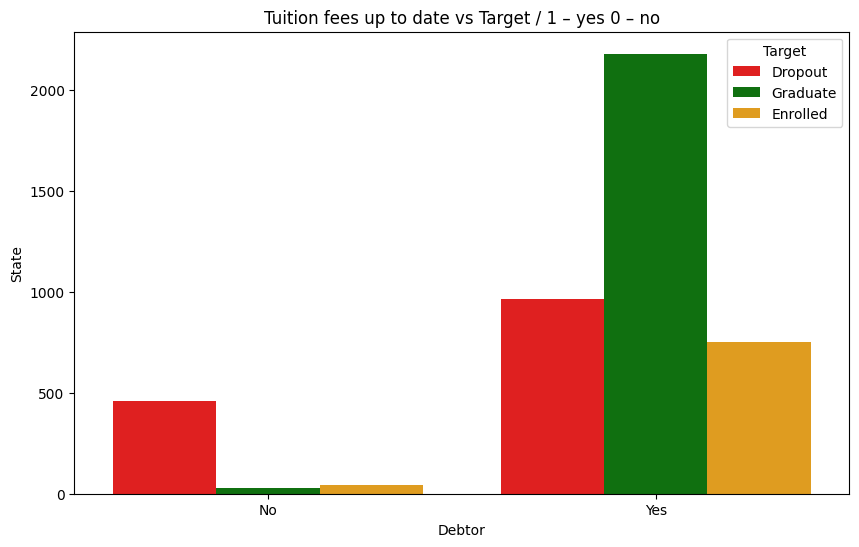

In [66]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura

sns.countplot(data = dataf, x ='fees', hue = 'Target', palette = {0: "red", 1: "green", 2: 'orange'})

# Personalizar el gráfico
plt.title("Tuition fees up to date vs Target / 1 – yes 0 – no")
plt.xlabel("Debtor")
plt.ylabel("State")
plt.legend(title="Target", labels=["Dropout", "Graduate", "Enrolled"])
plt.xticks(ticks=[0,1], labels=['No','Yes'])


# Mostrar el gráfico
plt.show()

Son menos los estudiantes con pagos atrasados pero si se atrsan en el pago probablemente deje los estudios

# Gender

<Axes: >

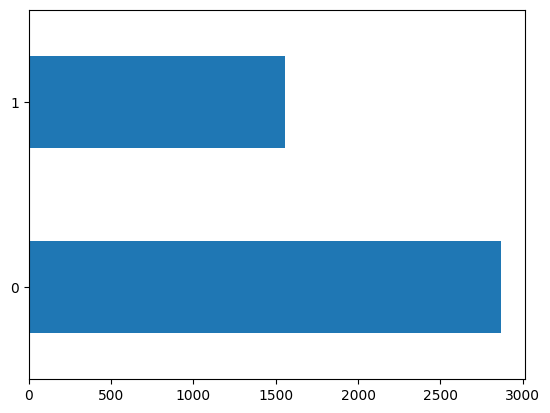

In [69]:
dataf.Gender.value_counts().plot(kind = 'barh')

In [75]:
male = len(dataf[dataf.Gender == 1])
female = len(dataf[dataf.Gender == 0])
n = len(dataf)
print(f'Cantidad de hombres: {((male / n) * 100)}%')
print(f'Cantidad de mujeres: {(female / n) * 100}%')

Cantidad de hombres: 35.171790235081374%
Cantidad de mujeres: 64.82820976491863%


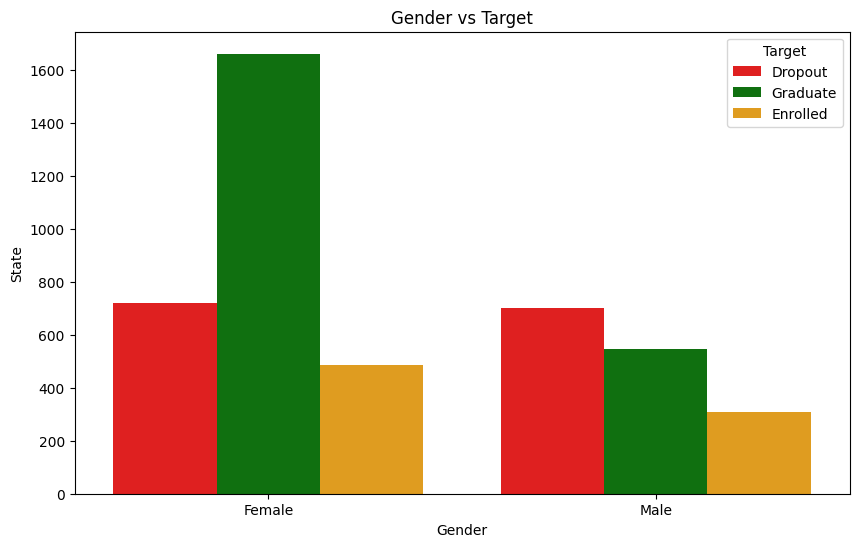

In [77]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura

sns.countplot(data = dataf, x ='Gender', hue = 'Target', palette = {0: "red", 1: "green", 2: 'orange'})

# Personalizar el gráfico
plt.title("Gender vs Target")
plt.xlabel("Gender")
plt.ylabel("State")
plt.legend(title = "Target", labels=["Dropout", "Graduate", "Enrolled"])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
# Mostrar el gráfico
plt.show()

In [82]:
df_graduate = dataf[dataf.Target == 1]
n = len(df_graduate)
female_graduate = len(df_graduate[df_graduate.Gender == 0])
male_graduate = len(df_graduate[df_graduate.Gender == 1])
print(f'Cantidad 100 estudiantes graduados hay: {((male_graduate / n) * 100)} hombres y {((female_graduate / n) * 100)} mujeres')


Cantidad 100 estudiantes graduados hay: 24.807605251244908 hombres y 75.19239474875509 mujeres


Se puede decir entonces que las mujeres se graduan 3 veces nas que los hombres

In [83]:
df_drop = dataf[dataf.Target == 0]
n = len(df_drop)
female_graduate = len(df_drop[df_drop.Gender == 0])
male_graduate = len(df_drop[df_drop.Gender == 1])
print(f'Cantidad 100 estudiantes que abandonan hay: {((male_graduate / n) * 100)} hombres y {((female_graduate / n) * 100)} mujeres')


Cantidad 100 estudiantes que abandonan hay: 49.33145672061928 hombres y 50.66854327938072 mujeres


Proporcionalmente ambos dejan por igual la carrera pero las mujres se graduan tres veces mas, un factor a considerar es que dentro del conjunto de datos hay el doble de mujeres, no hay que descartar que puede existir un tipo de sesgo